# Notes Agent

## Setting up llm

In [1]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph

In [2]:
load_dotenv()

True

In [3]:
llm = ChatOpenAI(openai_api_key=os.getenv("OPENAI_API_KEY"), model="gpt-3.5-turbo")

llm.invoke("Hi how are you")

# Sample Graph

In [10]:
from langgraph.graph import MessagesState

class OverallState(MessagesState):
    pass

In [12]:
def node_1(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"])]}

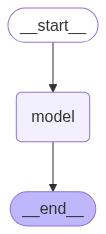

In [13]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(OverallState)

builder.add_node("model", node_1)

builder.add_edge(START, "model")
builder.add_edge("model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({"messages": ["hi"]})

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='d8e87f39-6949-43c5-b44b-f9191d93981b'),
  AIMessage(content='Hello! How are you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 8, 'total_tokens': 15, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BiTjdcymFrnjh4f9wMlB8njQrse8M', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6f0e5170-d2fb-4225-b9a5-d437b81e1763-0', usage_metadata={'input_tokens': 8, 'output_tokens': 7, 'total_tokens': 15, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}